### Glaciers contribution to sea level

Use fingerprints from Thomas.

Contribution from Marzeiron et al. -> Not long enough

Where is the Greenland periphery counted?

New Nature paper might be better, check that out

Contribution from missing and disapeared glaciers?


In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import SeaLevelContrib as slc
import importlib

In [186]:
importlib.reload(slc)

<module 'SeaLevelContrib' from '/Users/dewilebars/Projects/Project_SeaLevelBudgets/Notebooks/SeaLevelContrib.py'>

In [41]:
PATH_SeaLevelBudgets = '/Users/dewilebars/Projects/Project_SeaLevelBudgets/'


### Start with analysing Marzeion et al. 2015 data

In [32]:
M15_glo_df = slc.glaciers_m15_glo()
M15_glo_df.iloc[-10:]
M15_glo_df.Glaciers

time
1902.0    0.000000
1903.0    0.039455
1904.0    0.088706
1905.0    0.145229
1906.0    0.190765
            ...   
2009.0    6.606247
2010.0    6.675343
2011.0    6.765918
2012.0    6.840519
2013.0    6.898485
Name: Glaciers, Length: 112, dtype: float64

### Regional sea level contribution and individual fingerprints for the Dutch coast

In [27]:
M15_dir = (PATH_SeaLevelBudgets + 
           'Glaciers/Marzeion2015/tc-9-2399-2015-supplement/')
RGl = []
for i in range(1,19):
    RGl.append('RG'+str(i))
M15_reg_df = pd.read_csv(M15_dir + 'data_marzeion_etal_update_2015_regional.txt', header=None, 
                      names=['time'] + RGl, delim_whitespace=True)
M15_reg_df = M15_reg_df.set_index('time')
M15_reg_df = - M15_reg_df.cumsum() / 10 # Convert from mm to cm
M15_reg_df['Total'] = M15_reg_df.sum(axis=1)
M15_reg_df.iloc[-10:]

,RG1,RG2,RG3,RG4,RG5,RG6,RG7,RG8,RG9,RG10,RG11,RG12,RG13,RG14,RG15,RG16,RG17,RG18,Total
time,,,,,,,,,,,,,,,,,,,
2004.0,0.629947,0.261865,0.519602,0.379809,1.131811,0.081323,0.471019,0.018426,0.561836,0.020230,0.018229,0.002762,0.673714,0.595231,0.342240,0.242063,0.272247,0.051951,6.274306
2005.0,0.649180,0.263310,0.541083,0.377832,1.143896,0.081613,0.483362,0.018460,0.569229,0.020390,0.019151,0.002905,0.679690,0.598707,0.345419,0.242599,0.277077,0.051932,6.365836
2006.0,0.658914,0.266765,0.547396,0.373356,1.150659,0.083751,0.498619,0.019348,0.572336,0.020691,0.020044,0.003047,0.687325,0.603006,0.348643,0.242863,0.279279,0.052092,6.428136
2007.0,0.672234,0.266881,0.570809,0.368868,1.163125,0.085086,0.510224,0.019309,0.579653,0.020971,0.020587,0.003406,0.694289,0.607395,0.351531,0.243241,0.281439,0.052220,6.511270
2008.0,0.674646,0.267925,0.587146,0.364217,1.176909,0.088004,0.515446,0.019666,0.587006,0.021425,0.020911,0.003539,0.702875,0.612013,0.354086,0.243277,0.284290,0.052425,6.575804
2009.0,0.682632,0.270293,0.613289,0.362552,1.187368,0.089779,0.526238,0.020154,0.591586,0.021517,0.021767,0.003563,0.708211,0.615864,0.358246,0.243409,0.287018,0.052418,6.655905
2010.0,0.700600,0.270875,0.625236,0.359018,1.203500,0.093000,0.531761,0.020457,0.595382,0.021701,0.022037,0.004025,0.713452,0.618623,0.361868,0.243915,0.287113,0.052438,6.725002
2011.0,0.713084,0.271924,0.647600,0.356897,1.211718,0.094507,0.550327,0.021080,0.603571,0.022012,0.022777,0.004161,0.721646,0.623691,0.364716,0.243982,0.289320,0.052563,6.815576
2012.0,0.713043,0.273434,0.678282,0.353320,1.213185,0.095106,0.559543,0.020919,0.619544,0.022331,0.023539,0.004575,0.729291,0.627595,0.367859,0.244105,0.291728,0.052778,6.890178


In [28]:
# List of Randolph Glacier Inventory regions:
RGI_r = ['Alaska', 'Western Canada and US', 'Arctic Canada North', 
         'Arctic Canada South', 'Greenland Periphery', 'Iceland', 'Svalbard', 
         'Scandinavia', 'Russian Arctic', 'North Asia', 'Central Europe', 
         'Caucasus and Middle East', 'Central Asia', 'South Asia West',
         'South Asia East', 'Low Latitudes', 'Southern Andes', 'New Zealand', 
         'Antarctic and Subantarctic']

tg_id = [22]
RGI_loc = np.zeros(len(tg_id))
fp_dir = '/Users/dewilebars/Projects/Project_SeaLevelBudgets/fp_uniform/'
M15_regloc_df = M15_reg_df.copy()

for i in range(1,19):
    filename = 'RGI_'+ str(i) +'.nc'
    print('Opening ' + filename + ' for ' + RGI_r[i-1])
    RGI = xr.open_dataset(fp_dir + filename)
    for j in range(len(tg_id)):
        tg_lat, tg_lon =  slc.tg_lat_lon(tg_id[j])
        RGI_loc[j] = RGI.rsl.sel(x = tg_lon, y = tg_lat, method='nearest').values    
    M15_regloc_df['RG' + str(i)] = M15_regloc_df['RG' + str(i)] * RGI_loc.mean()
    print(RGI_loc.mean())
M15_regloc_df['Total'] = 0
M15_regloc_df['Total'] = M15_regloc_df.sum(axis=1)
print('Total in 2013: ')
print(M15_regloc_df.Total.iloc[-1])
print('Fraction of global: ')
print(M15_regloc_df.Total.iloc[-1] / M15_glo_df.Glaciers.iloc[-1])


Opening RGI_1.nc for Alaska
1.201348900794983
Opening RGI_2.nc for Western Canada and US
1.1479744911193848
Opening RGI_3.nc for Arctic Canada North
0.5816894173622131
Opening RGI_4.nc for Arctic Canada South
0.50312340259552
Opening RGI_5.nc for Greenland Periphery
0.11515027284622192
Opening RGI_6.nc for Iceland
-0.8709474205970764
Opening RGI_7.nc for Svalbard
0.0894579142332077
Opening RGI_8.nc for Scandinavia
-1.6684883832931519
Opening RGI_9.nc for Russian Arctic
0.43323642015457153
Opening RGI_10.nc for North Asia
0.968853771686554
Opening RGI_11.nc for Central Europe
-4.757112979888916
Opening RGI_12.nc for Caucasus and Middle East
-0.057304877787828445
Opening RGI_13.nc for Central Asia
0.7122862339019775
Opening RGI_14.nc for South Asia West
0.6808560490608215
Opening RGI_15.nc for South Asia East
0.8574588298797607
Opening RGI_16.nc for Low Latitudes
1.0500962734222412
Opening RGI_17.nc for Southern Andes
1.1723170280456543
Opening RGI_18.nc for New Zealand
0.801791071891784

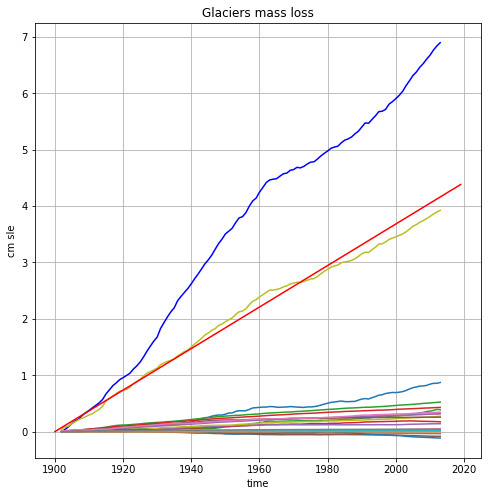

In [39]:
gia_ts_df = slc.GIA_ICE6G() # Convert from cm to mm

#Plot time series
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(M15_glo_df.Glaciers, 'b-')
ax.plot(M15_regloc_df)
ax.plot(gia_ts_df, 'r-')
#ax.set_aspect(1)
plt.xlabel('time')
plt.ylabel('cm sle')
plt.title('Glaciers mass loss')
ax.grid(True)


### Time evolution of the regional fraction of global sea level contribution

In [204]:
glac_ts_df = slc.glaciers_m15([22], extrap=False, del_green=True)
glac_ts_glo_df = slc.glaciers_m15(None, extrap=False, del_green=True)
frac_df = glac_ts_df/glac_ts_glo_df
frac_df.iloc[-10:]

,Glaciers
time,
2004.0,0.673027
2005.0,0.672666
2006.0,0.670627
2007.0,0.669569
2008.0,0.668028
2009.0,0.666215
2010.0,0.666073
2011.0,0.663824
2012.0,0.661580


### Analyse the Zemp et al. 2019 data

In [62]:
path_zemp = (PATH_SeaLevelBudgets + 
             'Glaciers/Zemp2019/Zemp_etal_results_regions_global_v11/')

zemp_df = pd.read_csv(path_zemp + 'Zemp_etal_results_global.csv', skiprows=19)
zemp_df = zemp_df.set_index('Year')
zemp_df.columns = [i.strip() for i in zemp_df.columns]
zemp_df.iloc[-10:]

,Area_AW_ref_km2,INT_Gt,sig_Glac_Gt,sig_Geod_Gt,sig_Int_Gt,sig_Area_Gt,sig_Crossed_Gt,sig_Total_Gt,INT_SLE,sig_Total_SLE
Year,,,,,,,,,,
2007,692089,-303,111,139,56,6,10,187,0.836,0.516
2008,689812,-244,108,139,56,5,10,185,0.673,0.510
2009,687535,-316,107,138,56,7,10,184,0.872,0.508
2010,685258,-298,107,138,56,6,10,184,0.822,0.508
2011,682980,-415,108,138,56,8,10,184,1.145,0.508
2012,680703,-304,112,137,55,7,10,186,0.839,0.513
2013,678426,-355,111,137,55,8,10,186,0.979,0.513
2014,676149,-290,119,137,55,7,10,190,0.800,0.524
2015,673872,-397,125,137,55,9,11,194,1.095,0.535


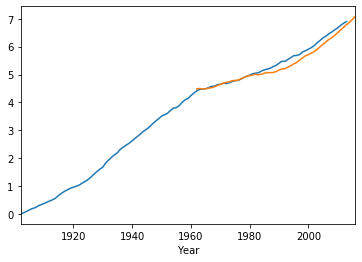

In [71]:
M15_glo_df.Glaciers.plot()
zemp_glo_df = zemp_df['INT_SLE'].cumsum()/10
zemp_glo_df = zemp_glo_df + M15_glo_df.Glaciers.loc[1979] - zemp_glo_df.loc[1979]
zemp_glo_df.plot()

Zemp et al. has less melt in the 1980th and more in the last 20 years compared to Marzeion et al. 2015.
The Zemp data also provides a faster acceleration which seems in line with budget requierements.

### Functions to compute global and regional sea level contribution from Zemp et al. 2019

In [197]:
zemp_glo_df = slc.glaciers_zemp19_glo()
zemp_glo_df.iloc[-10:]

,Glaciers
Year,
2007,1.8313
2008,1.8986
2009,1.9858
2010,2.0680
2011,2.1825
2012,2.2664
2013,2.3643
2014,2.4443
2015,2.5538


In [200]:
zemp_df = slc.glaciers_zemp19(None)
zemp_df.iloc[-10:]

,Glaciers
Year,
2007,2.289671
2008,2.357392
2009,2.445110
2010,2.527954
2011,2.643360
2012,2.727803
2013,2.826474
2014,2.907154
2015,3.017492


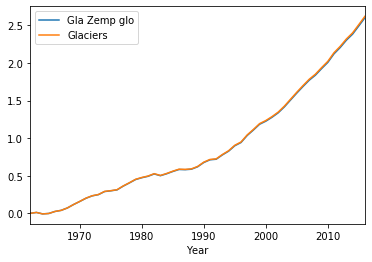

In [201]:
zemp_glo_df.rename(columns={'Glaciers': 'Gla Zemp glo'}, inplace=True)

zemp_comp_df = pd.merge(zemp_glo_df, zemp_df, how='inner', on='Year')
zemp_comp_df = zemp_comp_df - zemp_comp_df.loc[1962]
#comp = comp - comp.loc[1962]
zemp_comp_df.plot()


The sum of individual glacier contribution is not exactly the same as the global. This tiny difference seems arise from the fact that Zemp et al. 2019 use conversion factor slightly different from the one we use here (360Gt for 1 mm sea level).

In [205]:
zemp_glo_df = slc.glaciers_zemp19(None, del_green=True)
zemp_loc_df = slc.glaciers_zemp19([22], del_green=True)
(zemp_loc_df/zemp_glo_df).iloc[-10:]

,Glaciers
Year,
2007,0.803419
2008,0.799653
2009,0.801059
2010,0.795495
2011,0.789116
2012,0.784525
2013,0.785951
2014,0.789220
2015,0.792998


The fingerprint for the Dutch coast is also a little larger from Zemp et al. 2019 than for Marzeion et al. 2015 (0.79 and 0.66). Even using the same regional fingerprints from Thomas Frederikse so the difference comes from a larger contribution from glaciers further away from the Dutch coast.

### Now compare Marzeion et al. 2015 and Zemp et al. 2019 for the Dutch coast

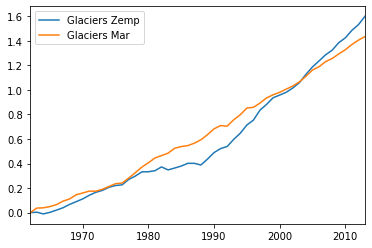

In [212]:
zemp_loc_df = slc.glaciers_zemp19([22], del_green=True)
zemp_loc_df.rename(columns={'Glaciers': 'Glaciers Zemp'}, inplace=True)
m15_loc_df = slc.glaciers_m15([22], del_green=True)
m15_loc_df.rename(columns={'Glaciers': 'Glaciers Mar'}, inplace=True)

#comp_df = pd.merge(zemp_loc_df, zemp_df, how='inner', on='Year')
comp_df = zemp_loc_df.join(m15_loc_df, how='inner')
comp_df = comp_df - comp_df.loc[1962]
#zemp_loc_df.plot()
#m15_loc_df.plot()
comp_df.plot()

In [207]:
m15_loc_df

,Glaciers
time,
1902.0,0.045817
1903.0,0.080962
1904.0,0.096596
1905.0,0.139858
1906.0,0.174274
1907.0,0.210760
1908.0,0.234930
1909.0,0.257221
1910.0,0.287738
